In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Note about the dataset: 

The images for the hand-written 46 devanagari alphabets are stored in the 'DevanagariHandwrittenCharacterDataset' folder in the same directory as this notebook. The folder contains the train and test folders which have 1701 and 301 images of the 46 alphabets.

Let's take a look at some of the images.

(32, 32)

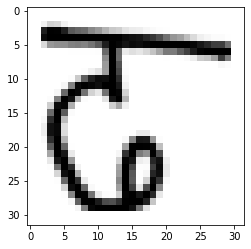

In [6]:
dhaa = cv2.imread('DevanagariHandwrittenCharacterDataset/train/character_14_dhaa/10717.png',0)
plt.imshow(dhaa,cmap='gray_r')
dhaa.shape

(32, 32)

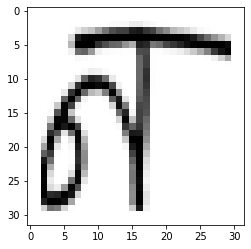

In [7]:
na = cv2.imread('DevanagariHandwrittenCharacterDataset/train/character_20_na/11052.png',0)
plt.imshow(na,cmap='gray_r')
na.shape

(32, 32)

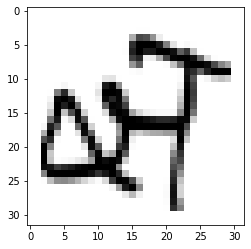

In [8]:
gya = cv2.imread('DevanagariHandwrittenCharacterDataset/test/character_36_gya/64441.png',0)
plt.imshow(gya,cmap='gray_r')
gya.shape

In [10]:
print(gya.min(),gya.max())

0 255


The images seem to be all of the same sizes (32x32) and some of them also have some rotation, so we don't have to induce random fluctuations to make the network more robust. Let's get straight to generating the flow of batches of training and test data.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rescale=1/255,
                              fill_mode='nearest')

In [15]:
input_shape = (32,32,1)   

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Flatten,Dense

In [33]:
# MODEL

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=input_shape,activation='relu'))

# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

# 2D --> 1D
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128,activation='relu'))

# OUTPUT LAYER
model.add(Dense(46,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 46)                5934      
Total params: 809,422
Trainable params: 809,422
Non-trainable params: 0
_________________________________________________________________


In [35]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('DevanagariHandwrittenCharacterDataset/train/',
                                     target_size=input_shape[:2],
                                    batch_size=batch_size,
                                    class_mode='categorical',color_mode='grayscale')

Found 78200 images belonging to 46 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory('DevanagariHandwrittenCharacterDataset/test/',
                                     target_size=input_shape[:2],
                                    batch_size=batch_size,
                                    class_mode='categorical',color_mode='grayscale')

Found 13800 images belonging to 46 classes.


In [37]:
train_image_gen.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 

In [38]:
results = model.fit_generator(train_image_gen,epochs=100,steps_per_epoch=200,
                              validation_data=test_image_gen,validation_steps=20)

Epoch 1/100
200/200 [==============================] - 6s 29ms/step - loss: 2.5741 - acc: 0.3297 - val_loss: 1.6756 - val_acc: 0.5562
Epoch 2/100
200/200 [==============================] - 6s 28ms/step - loss: 1.3023 - acc: 0.6300 - val_loss: 1.0163 - val_acc: 0.7094
Epoch 3/100
200/200 [==============================] - 7s 33ms/step - loss: 0.9229 - acc: 0.7362 - val_loss: 0.8070 - val_acc: 0.7594
Epoch 4/100
200/200 [==============================] - 10s 48ms/step - loss: 0.7320 - acc: 0.7900 - val_loss: 0.5716 - val_acc: 0.8250
Epoch 5/100
200/200 [==============================] - 6s 30ms/step - loss: 0.5867 - acc: 0.8313 - val_loss: 0.4599 - val_acc: 0.8594
Epoch 6/100
200/200 [==============================] - 5s 27ms/step - loss: 0.5396 - acc: 0.8469 - val_loss: 0.4367 - val_acc: 0.8562
Epoch 7/100
200/200 [==============================] - 5s 26ms/step - loss: 0.5093 - acc: 0.8519 - val_loss: 0.3328 - val_acc: 0.9250
Epoch 8/100
200/200 [==============================] - 5s 26m

In [39]:
# testing the trained model on an unseen image

In [41]:
from tensorflow.keras.preprocessing import image

array([15])

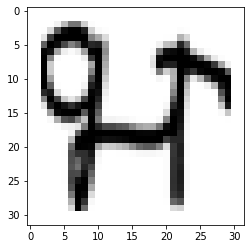

In [55]:
file = 'DevanagariHandwrittenCharacterDataset/test/character_24_bha/17529.png'
im=cv2.imread(file,0)
plt.imshow(im,cmap='gray_r')
img = image.load_img(file,grayscale=True)
img = image.img_to_array(img)
import numpy as np
img = np.expand_dims(img,axis=0)
img=img/255
model.predict_classes(img)

which is the correct class for the letter bha as you can check above

array([24])

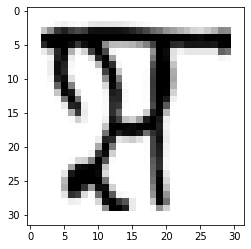

In [56]:
file = 'DevanagariHandwrittenCharacterDataset/test/character_32_patalosaw/11688.png'
im=cv2.imread(file,0)
plt.imshow(im,cmap='gray_r')
img = image.load_img(file,grayscale=True)
img = image.img_to_array(img)
import numpy as np
img = np.expand_dims(img,axis=0)
img=img/255
model.predict_classes(img)

which is the correct class for patalosaw